<a href="https://colab.research.google.com/github/Jocelyn-Garcia4rt/Graficas_INEGI/blob/main/PruebaDeHipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Practica_Hipotesis.xlsx to Practica_Hipotesis (5).xlsx


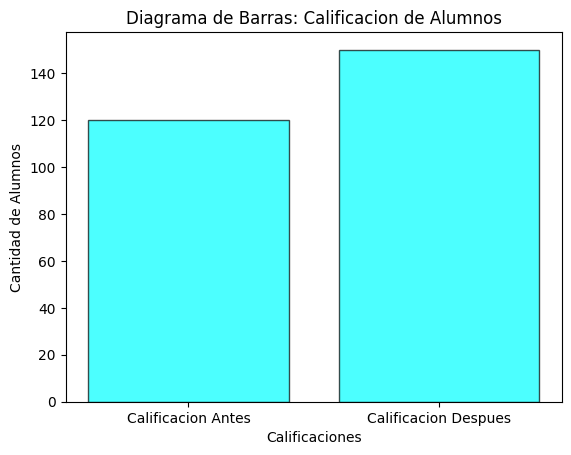

Rechazamos la hipótesis nula: Hay suficiente evidencia para concluir que la media no es igual a 75.


In [12]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Cargar el archivo
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)

# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Seleccionar la última columna (calificación general del servicio)
columna_calificacion = df.columns[-1]

# Convertir a valores numéricos
df[columna_calificacion] = pd.to_numeric(df[columna_calificacion], errors='coerce')

# Datos
x_bar = 50 # Media de la muestra
mu_0 = 75 # Media bajo la hipótesis nula
sigma = 10 # Desviación estándar de la población
n = 50 # Tamaño de la muestra
alpha = 0.05 # Nivel de significancia

# Calcular el valor de z
z = (x_bar - mu_0) / (sigma / math.sqrt(n))

# Determinar los valores críticos de z para una prueba bilateral (α = 0.05)
z_critical = stats.norm.ppf(1 - alpha / 2) # Para dos colas

# Crear el rango de valores z para la distribución normal
z_values = np.linspace(-4, 4, 1000)
pdf_values = stats.norm.pdf(z_values)

# Datos para el diagrama de barras
categories = ['Calificacion Antes', 'Calificacion Despues']
frequencies = [120, 150]

plt.bar(categories, frequencies, color='#00FFFF', alpha=0.7, edgecolor='black')
plt.title('Diagrama de Barras: Calificacion de Alumnos')
plt.xlabel('Calificaciones')
plt.ylabel('Cantidad de Alumnos')
plt.show()

# Comparar el valor calculado de z con los valores críticos
if abs(z) > z_critical:
    print("Rechazamos la hipótesis nula: Hay suficiente evidencia para concluir que la media no es igual a 75.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que la media es diferente de 75.")
